Preparacion de los Datos

In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("C:/Users/cacer/Downloads/challenge_edMachina.csv", delimiter=';')

# Vista general del dataset
print(df.head())



   particion periodo  nota_final_materia  fecha_mesa_epoch nombre_examen  \
0          0  1-2022                 9.0               NaN           NaN   
1          1  1-2022                 9.0               NaN           NaN   
2          2  1-2022                 9.0               NaN           NaN   
3          3  1-2022                 9.0               NaN           NaN   
4          4  1-2022                 9.0               NaN           NaN   

   nota_parcial  assignment_id ass_name  ass_created_at  ass_due_at  ...  \
0           NaN            NaN      NaN             NaN         NaN  ...   
1           NaN            NaN      NaN             NaN         NaN  ...   
2           NaN            NaN      NaN             NaN         NaN  ...   
3           NaN            NaN      NaN             NaN         NaN  ...   
4           NaN            NaN      NaN             NaN         NaN  ...   

   sub_uuid  score  submission_type s_submitted_at s_graded_at  s_created_at  \
0     

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196124 entries, 0 to 196123
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   particion           196124 non-null  int64  
 1   periodo             196124 non-null  object 
 2   nota_final_materia  196124 non-null  float64
 3   fecha_mesa_epoch    7010 non-null    float64
 4   nombre_examen       7010 non-null    object 
 5   nota_parcial        7010 non-null    float64
 6   assignment_id       26061 non-null   float64
 7   ass_name            26061 non-null   object 
 8   ass_created_at      26061 non-null   float64
 9   ass_due_at          26061 non-null   float64
 10  ass_unlock_at       24760 non-null   float64
 11  ass_lock_at         25979 non-null   float64
 12  points_possible     26061 non-null   float64
 13  ass_name_sub        24206 non-null   object 
 14  sub_uuid            24206 non-null   object 
 15  score               23876 non-null

 Explorar los Datos
- Revisamos el tipo de datos, valores únicos, y la presencia de valores faltantes.

In [3]:
# Descripción de las columnas
print(df.describe())

# Identificación de valores faltantes
print(df.isnull().sum())


           particion  nota_final_materia  fecha_mesa_epoch  nota_parcial  \
count  196124.000000       196124.000000      7.010000e+03   7010.000000   
mean       30.663891            7.546700      1.653584e+09      7.171469   
std        17.625074            1.732275      3.308269e+06      1.823261   
min         0.000000            0.000000      1.643587e+09      0.000000   
25%        15.000000            7.000000      1.651190e+09      6.000000   
50%        31.000000            8.000000      1.654214e+09      7.000000   
75%        46.000000            9.000000      1.656547e+09      9.000000   
max        59.000000           10.000000      1.658534e+09     10.000000   

       assignment_id  ass_created_at    ass_due_at  ass_unlock_at  \
count   26061.000000    2.606100e+04  2.606100e+04   2.476000e+04   
mean   204405.744983    1.648083e+09  1.654467e+09   1.650104e+09   
std      6486.514305    2.479788e+06  3.330116e+06   2.955982e+06   
min    191573.000000    1.643061e+09  1

Limpiar los Datos
 
 - Eliminamos valores faltantes.
 - Convertimos tipos de datos (por ejemplo, fechas).
 - Eliminamos duplicados.
 - Manejamos inconsistencias.


In [4]:
# Imputar valores faltantes con la mediana para `nota_parcial`
df['nota_parcial'].fillna(df['nota_parcial'].median(), inplace=True)

# Convertir fechas al formato datetime
df['ass_created_at'] = pd.to_datetime(df['ass_created_at'])
df['ass_due_at'] = pd.to_datetime(df['ass_due_at'])
df['ass_unlock_at'] = pd.to_datetime(df['ass_unlock_at'])
df['ass_lock_at'] = pd.to_datetime(df['ass_lock_at'])
df['s_submitted_at'] = pd.to_datetime(df['s_submitted_at'])
df['s_graded_at'] = pd.to_datetime(df['s_graded_at'])
df['s_created_at'] = pd.to_datetime(df['s_created_at'])

# Eliminar duplicados
df.drop_duplicates(inplace=True)


Análisis Exploratorio de Datos (EDA)

Descripción Estadística
- Generamos estadísticas descriptivas para entender la distribución de las variables.

In [5]:
# Estadísticas descriptivas
print(df.describe())

           particion  nota_final_materia  fecha_mesa_epoch   nota_parcial  \
count  194394.000000       194394.000000      7.010000e+03  194394.000000   
mean       30.664902            7.551262      1.653584e+09       7.006183   
std        17.624001            1.730316      3.308269e+06       0.347681   
min         0.000000            0.000000      1.643587e+09       0.000000   
25%        15.000000            7.000000      1.651190e+09       7.000000   
50%        31.000000            8.000000      1.654214e+09       7.000000   
75%        46.000000            9.000000      1.656547e+09       7.000000   
max        59.000000           10.000000      1.658534e+09      10.000000   

       assignment_id  points_possible         score  
count   25807.000000     25807.000000  23664.000000  
mean   204358.349983        99.596621     84.183795  
std      6488.397469         6.313704     18.225116  
min    191573.000000         0.000000      0.000000  
25%    197196.000000       100.00000

In [6]:
print(df)

        particion periodo  nota_final_materia  fecha_mesa_epoch nombre_examen  \
0               0  1-2022                 9.0               NaN           NaN   
1               1  1-2022                 9.0               NaN           NaN   
2               2  1-2022                 9.0               NaN           NaN   
3               3  1-2022                 9.0               NaN           NaN   
4               4  1-2022                 9.0               NaN           NaN   
...           ...     ...                 ...               ...           ...   
196119         55  1-2022                10.0               NaN           NaN   
196120         56  1-2022                10.0               NaN           NaN   
196121         57  1-2022                10.0               NaN           NaN   
196122         58  1-2022                10.0               NaN           NaN   
196123         59  1-2022                10.0               NaN           NaN   

        nota_parcial  assig

Visualizaciones Iniciales
- Creamos histogramas, gráficos de densidad, y boxplots para nota_final_materia y otras variables importantes.

HISTOGRAMA

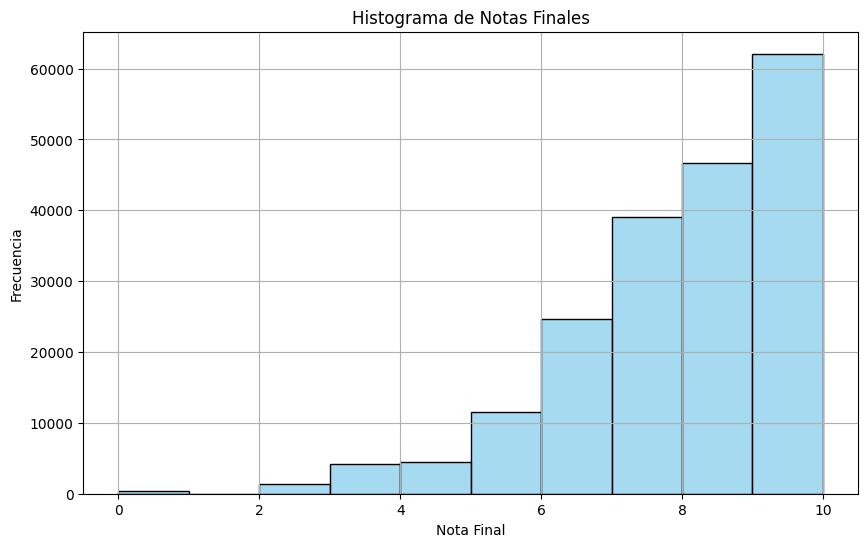

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de `nota_final_materia`
plt.figure(figsize=(10, 6))
sns.histplot(df['nota_final_materia'], bins=10, kde=False, color='skyblue')
plt.title('Histograma de Notas Finales')
plt.xlabel('Nota Final')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# El histograma muestra la distribución de las notas finales en el dataset. Los bins (contenedores) dividen 
# el rango de valores en intervalos, y la altura de cada barra representa la frecuencia de notas en ese intervalo.


Gráfico de Densidad


C:\Users\cacer\AppData\Local\Temp\ipykernel_17388\805027879.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['nota_final_materia'], shade=True, color='skyblue')


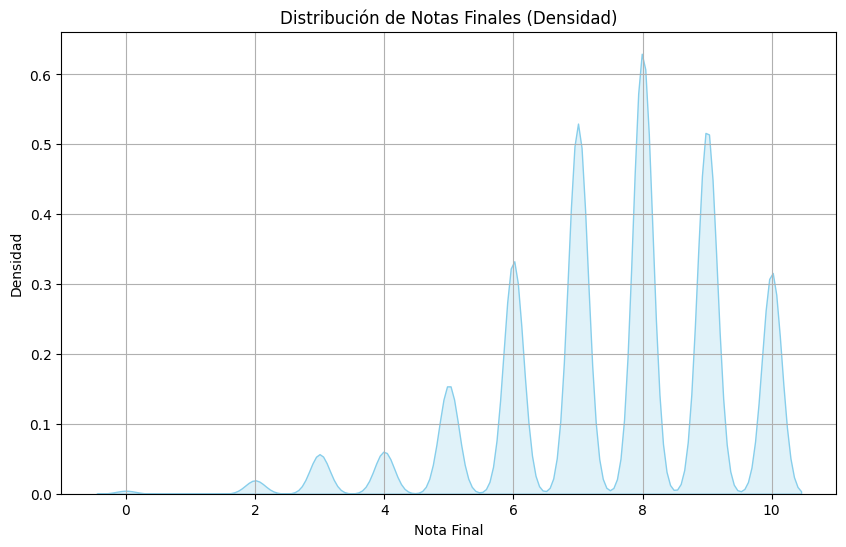

In [8]:
# Gráfico de densidad de `nota_final_materia`
plt.figure(figsize=(10, 6))
sns.kdeplot(df['nota_final_materia'], shade=True, color='skyblue')
plt.title('Distribución de Notas Finales (Densidad)')
plt.xlabel('Nota Final')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()


#El gráfico de densidad muestra una versión suavizada de la distribución de las notas finales, proporcionando 
# una estimación de la densidad de probabilidad de las notas.

Boxplot

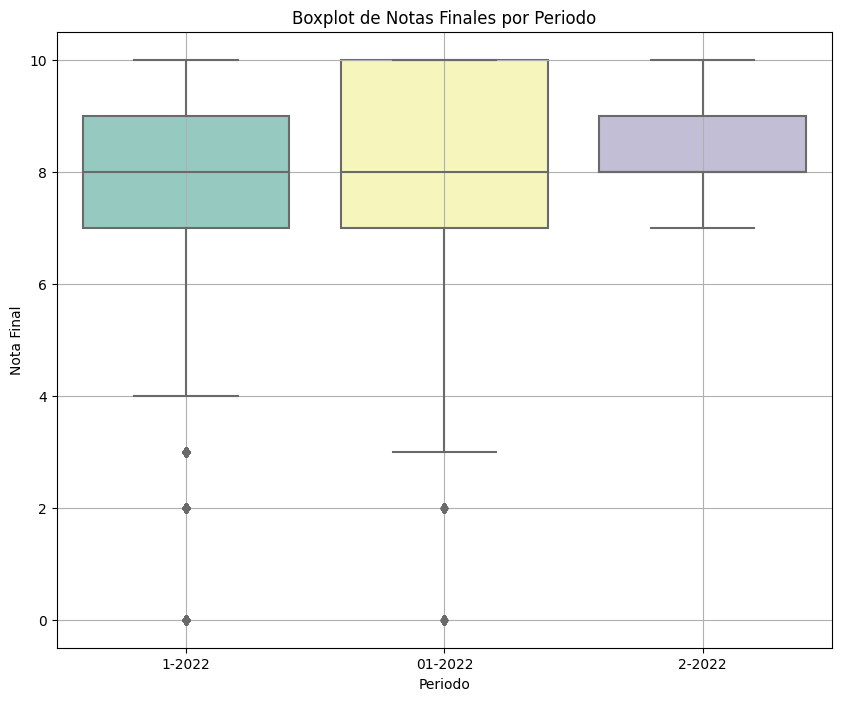

In [9]:
# Boxplot de `nota_final_materia` agrupado por `periodo`
plt.figure(figsize=(10, 8))
sns.boxplot(x='periodo', y='nota_final_materia', data=df, palette='Set3')
plt.title('Boxplot de Notas Finales por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Nota Final')
plt.grid(True)
plt.show()

#El boxplot muestra la distribución de las notas finales según cada periodo académico. Permite identificar la mediana
#  (línea central en la caja), los cuartiles (caja) y los valores atípicos (puntos fuera de los bigotes).

Análisis de Correlación
- Creamos un mapa de calor para visualizar las correlaciones entre variables.

C:\Users\cacer\AppData\Local\Temp\ipykernel_17388\740257396.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


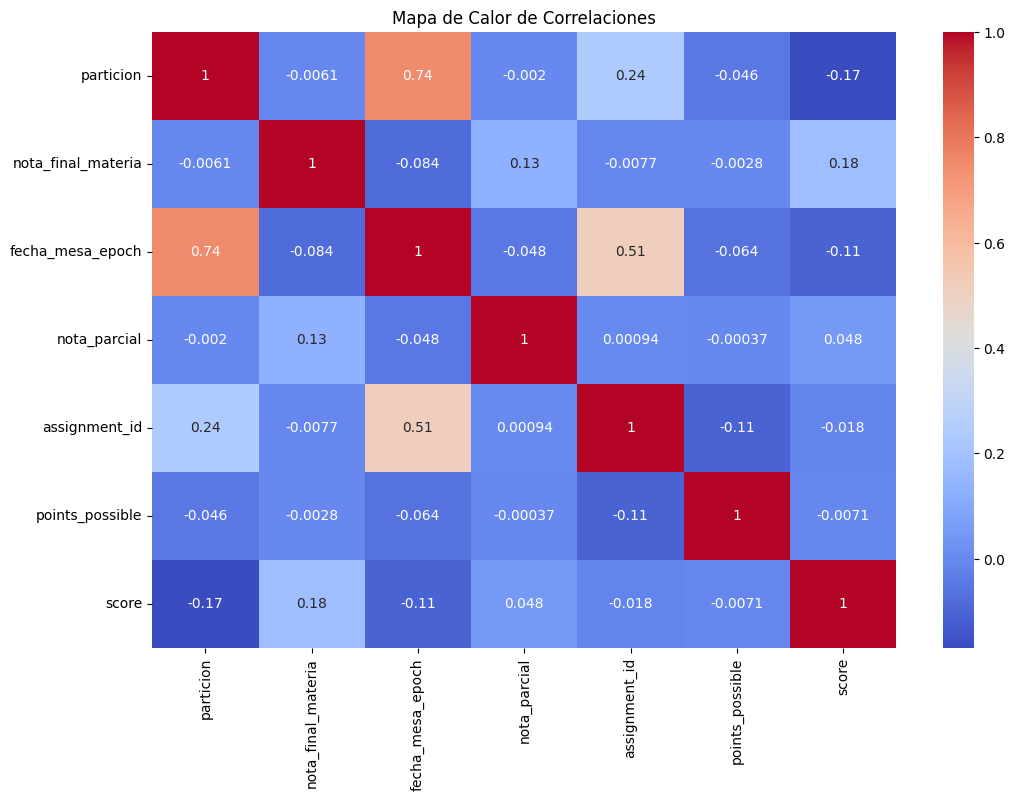

In [10]:
# Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()


 Agrupaciones y Segmentaciones
- Analizamos los datos por user_uuid, course_uuid y particion.

In [11]:
# Agrupación por usuario, curso y partición
grouped = df.groupby(['user_uuid', 'course_uuid', 'particion']).agg({
    'nota_final_materia': 'mean',
    'nota_parcial': 'mean',
    'score': 'sum',
    'points_possible': 'sum'
}).reset_index()

print(grouped.head())


                              user_uuid                           course_uuid  \
0  01103370-3046-4bc0-a8f8-85858ec0ec88  2dd2ca01-a672-4eca-aca7-6fbc8cd01953   
1  01103370-3046-4bc0-a8f8-85858ec0ec88  2dd2ca01-a672-4eca-aca7-6fbc8cd01953   
2  01103370-3046-4bc0-a8f8-85858ec0ec88  2dd2ca01-a672-4eca-aca7-6fbc8cd01953   
3  01103370-3046-4bc0-a8f8-85858ec0ec88  2dd2ca01-a672-4eca-aca7-6fbc8cd01953   
4  01103370-3046-4bc0-a8f8-85858ec0ec88  2dd2ca01-a672-4eca-aca7-6fbc8cd01953   

   particion  nota_final_materia  nota_parcial  score  points_possible  
0          0                 7.0           7.0    0.0              0.0  
1          1                 7.0           7.0    0.0              0.0  
2          2                 7.0           7.0    0.0              0.0  
3          3                 7.0           7.0    0.0              0.0  
4          4                 7.0           7.0    0.0              0.0  


Ingeniería de Características


Creamos nuevas caracteristicas 
- Basado en el análisis exploratorio, sugerimos y creamos nuevas columnas que nos ayudaran en nuestra visualizacion.

In [12]:
# Crear nuevas características
df['total_entregas'] = df.groupby(['user_uuid', 'course_uuid'])['assignment_id'].transform('count')
df['total_examenes'] = df.groupby(['user_uuid', 'course_uuid'])['nombre_examen'].transform('count')
df['promedio_parcial'] = df.groupby(['user_uuid', 'course_uuid'])['nota_parcial'].transform('mean')

print(df.head())


   particion periodo  nota_final_materia  fecha_mesa_epoch nombre_examen  \
0          0  1-2022                 9.0               NaN           NaN   
1          1  1-2022                 9.0               NaN           NaN   
2          2  1-2022                 9.0               NaN           NaN   
3          3  1-2022                 9.0               NaN           NaN   
4          4  1-2022                 9.0               NaN           NaN   

   nota_parcial  assignment_id ass_name ass_created_at ass_due_at  ...  \
0           7.0            NaN      NaN            NaT        NaT  ...   
1           7.0            NaN      NaN            NaT        NaT  ...   
2           7.0            NaN      NaN            NaT        NaT  ...   
3           7.0            NaN      NaN            NaT        NaT  ...   
4           7.0            NaN      NaN            NaT        NaT  ...   

  s_submitted_at s_graded_at  s_created_at  \
0            NaT         NaT           NaT   
1     

Exportamos el dataset con sus cambios

In [13]:
# Exportar el dataset limpio y enriquecido
df.to_csv('Challenge_edMachina2.csv', index=False)
